In [1]:
#Comments to run on Colab
#!apt-get -qq update; apt-get install -y python-dev libfftw3-dev libeigen3-dev ffmpeg pybind11-dev
#!pip install rmjarvis.eigency>=1.77.1
#!pip install galsim --no-cache-dir
#from google.colab import drive
#drive.mount('/content/drive')
#%cd drive/MyDrive/denoising
#!pip install scikit-image

import galsim
import tensorflow as tf
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession
config = ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)
import numpy as np
import matplotlib.pyplot as plt
%pylab inline

from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

from unets.unet import Unet


print(tf.test.gpu_device_name())

Populating the interactive namespace from numpy and matplotlib
/device:GPU:0


dataset = np.load('datasets/dataset_45_64.npy',allow_pickle='TRUE').item()

im_train, im_val, target_train, target_val = train_test_split(dataset['VIGNETS_WITH_NOISE'], dataset['VIGNET_NOISELESS'],
                                                              test_size=0.2, random_state=10, shuffle=False, stratify=None)

im_train, target_train = shuffle(im_train, target_train)
#im_val, target_val = shuffle(im_val, target_val)

im_train = (tf.reshape(tf.convert_to_tensor(im_train), [36000, 64, 64, 1]))
target_train = tf.reshape(tf.convert_to_tensor(target_train), [36000, 64, 64, 1])
im_val = (tf.reshape(tf.convert_to_tensor(im_val), [9000, 64, 64, 1]))
target_val = tf.reshape(tf.convert_to_tensor(target_val), [9000, 64, 64, 1])

In [2]:
dataset = np.load('datasets/dataset_eigenpsfs.npy',allow_pickle='TRUE').item()
#dataset2 = np.load('datasets/dataset_gen_test.npy',allow_pickle='TRUE').item()

im_train, im_val, target_train, target_val = train_test_split(dataset['VIGNETS_WITH_NOISE'], dataset['VIGNETS_NOISELESS'], 
                                                              shuffle=False, stratify=None, test_size=0.1, random_state=10)

im_train, target_train = shuffle(im_train, target_train)
#im_val, target_val = shuffle(im_val, target_val)

for i in range (len(im_train)):
    
    norm = np.linalg.norm(im_train[i])
    im_train[i] = im_train[i]/norm
    target_train[i] = target_train[i]/norm
    
coeff = np.zeros(len(im_val))

for i in range (len(im_val)):
    
    coeff[i] = np.linalg.norm(im_val[i])
    im_val[i] = im_val[i]/coeff[i]
    target_val[i] = target_val[i]/coeff[i]
    
im_train = (tf.reshape(tf.convert_to_tensor(im_train), [len(im_train), 51, 51, 1]))
target_train = tf.reshape(tf.convert_to_tensor(target_train), [len(im_train), 51, 51, 1])
im_val = (tf.reshape(tf.convert_to_tensor(im_val), [len(im_val), 51, 51, 1]))
target_val = tf.reshape(tf.convert_to_tensor(target_val), [len(im_val), 51, 51, 1])





In [3]:
np.shape(im_val)

TensorShape([2085, 51, 51, 1])

In [20]:
model=Unet(n_output_channels=1, kernel_size=3, layers_n_channels=[32, 64, 128, 256])
adam = tf.keras.optimizers.Adam(learning_rate=1e-4)
model.compile(optimizer=adam, loss='mse')
history = model.fit(im_train, target_train, validation_data=(im_val, target_val), batch_size=16, 
           epochs=1000, steps_per_epoch=200)
print(model.summary())

Epoch 1/1000
200/200 [==============================] - 5s 17ms/step - loss: 1.8085e-04 - val_loss: 1.2437e-05
Epoch 2/1000
200/200 [==============================] - 3s 16ms/step - loss: 1.0271e-05 - val_loss: 5.9227e-06
Epoch 3/1000
200/200 [==============================] - 3s 16ms/step - loss: 5.5325e-06 - val_loss: 3.9095e-06
Epoch 4/1000
200/200 [==============================] - 3s 16ms/step - loss: 3.7956e-06 - val_loss: 3.1281e-06
Epoch 5/1000
200/200 [==============================] - 3s 16ms/step - loss: 2.8490e-06 - val_loss: 2.4546e-06
Epoch 6/1000
200/200 [==============================] - 4s 18ms/step - loss: 2.4248e-06 - val_loss: 2.1255e-06
Epoch 7/1000
200/200 [==============================] - 3s 16ms/step - loss: 2.1493e-06 - val_loss: 1.9195e-06
Epoch 8/1000
200/200 [==============================] - 3s 16ms/step - loss: 1.9617e-06 - val_loss: 1.8017e-06
Epoch 9/1000
200/200 [==============================] - 3s 16ms/step - loss: 1.7088e-06 - val_loss: 2.0043e-06
E

200/200 [==============================] - 3s 16ms/step - loss: 6.8045e-07 - val_loss: 7.1106e-07
Epoch 75/1000
200/200 [==============================] - 3s 16ms/step - loss: 6.8896e-07 - val_loss: 6.6929e-07
Epoch 76/1000
200/200 [==============================] - 3s 16ms/step - loss: 6.7836e-07 - val_loss: 7.0155e-07
Epoch 77/1000
200/200 [==============================] - 3s 16ms/step - loss: 7.0872e-07 - val_loss: 6.6436e-07
Epoch 78/1000
200/200 [==============================] - 3s 16ms/step - loss: 6.3461e-07 - val_loss: 6.9736e-07
Epoch 79/1000
200/200 [==============================] - 3s 16ms/step - loss: 7.2516e-07 - val_loss: 6.7823e-07
Epoch 80/1000
200/200 [==============================] - 3s 16ms/step - loss: 6.4759e-07 - val_loss: 6.6847e-07
Epoch 81/1000
200/200 [==============================] - 3s 16ms/step - loss: 6.6765e-07 - val_loss: 6.8185e-07
Epoch 82/1000
200/200 [==============================] - 3s 16ms/step - loss: 6.3156e-07 - val_loss: 6.6734e-07
Epoch 

Epoch 147/1000
200/200 [==============================] - 3s 16ms/step - loss: 5.2485e-07 - val_loss: 5.2730e-07
Epoch 148/1000
200/200 [==============================] - 3s 16ms/step - loss: 5.4827e-07 - val_loss: 5.3015e-07
Epoch 149/1000
200/200 [==============================] - 3s 16ms/step - loss: 5.3446e-07 - val_loss: 5.4781e-07
Epoch 150/1000
200/200 [==============================] - 3s 16ms/step - loss: 5.1925e-07 - val_loss: 5.4702e-07
Epoch 151/1000
200/200 [==============================] - 3s 16ms/step - loss: 5.2152e-07 - val_loss: 5.3164e-07
Epoch 152/1000
200/200 [==============================] - 3s 16ms/step - loss: 5.2212e-07 - val_loss: 5.2251e-07
Epoch 153/1000
200/200 [==============================] - 3s 16ms/step - loss: 5.6087e-07 - val_loss: 6.0592e-07
Epoch 154/1000
200/200 [==============================] - 3s 16ms/step - loss: 5.3605e-07 - val_loss: 5.3428e-07
Epoch 155/1000
200/200 [==============================] - 3s 16ms/step - loss: 5.4066e-07 - val_

200/200 [==============================] - 3s 16ms/step - loss: 4.9123e-07 - val_loss: 4.9049e-07
Epoch 220/1000
200/200 [==============================] - 3s 16ms/step - loss: 4.5760e-07 - val_loss: 4.6480e-07
Epoch 221/1000
200/200 [==============================] - 3s 16ms/step - loss: 4.3635e-07 - val_loss: 4.8053e-07
Epoch 222/1000
200/200 [==============================] - 3s 16ms/step - loss: 4.6624e-07 - val_loss: 4.7503e-07
Epoch 223/1000
200/200 [==============================] - 3s 16ms/step - loss: 4.6211e-07 - val_loss: 4.7322e-07
Epoch 224/1000
200/200 [==============================] - 3s 16ms/step - loss: 4.4502e-07 - val_loss: 4.8325e-07
Epoch 225/1000
200/200 [==============================] - 3s 16ms/step - loss: 4.5657e-07 - val_loss: 5.1293e-07
Epoch 226/1000
200/200 [==============================] - 3s 16ms/step - loss: 4.8003e-07 - val_loss: 4.7455e-07
Epoch 227/1000
200/200 [==============================] - 3s 16ms/step - loss: 4.7745e-07 - val_loss: 4.6294e-0

200/200 [==============================] - 3s 16ms/step - loss: 4.4603e-07 - val_loss: 4.7672e-07
Epoch 292/1000
200/200 [==============================] - 3s 16ms/step - loss: 4.1307e-07 - val_loss: 4.4433e-07
Epoch 293/1000
200/200 [==============================] - 3s 16ms/step - loss: 4.0323e-07 - val_loss: 4.2517e-07
Epoch 294/1000
200/200 [==============================] - 3s 16ms/step - loss: 4.2834e-07 - val_loss: 4.3898e-07
Epoch 295/1000
200/200 [==============================] - 3s 16ms/step - loss: 4.2768e-07 - val_loss: 4.3696e-07
Epoch 296/1000
200/200 [==============================] - 3s 16ms/step - loss: 4.2567e-07 - val_loss: 4.2642e-07
Epoch 297/1000
200/200 [==============================] - 3s 16ms/step - loss: 4.2737e-07 - val_loss: 4.3042e-07
Epoch 298/1000
200/200 [==============================] - 3s 16ms/step - loss: 4.1335e-07 - val_loss: 4.2577e-07
Epoch 299/1000
200/200 [==============================] - 3s 16ms/step - loss: 4.0008e-07 - val_loss: 4.2505e-0

200/200 [==============================] - 3s 16ms/step - loss: 4.1064e-07 - val_loss: 4.0566e-07
Epoch 364/1000
200/200 [==============================] - 3s 16ms/step - loss: 4.0927e-07 - val_loss: 4.1793e-07
Epoch 365/1000
200/200 [==============================] - 3s 16ms/step - loss: 3.9219e-07 - val_loss: 4.0541e-07
Epoch 366/1000
200/200 [==============================] - 3s 16ms/step - loss: 3.9166e-07 - val_loss: 4.4740e-07
Epoch 367/1000
200/200 [==============================] - 3s 16ms/step - loss: 3.9377e-07 - val_loss: 3.9871e-07
Epoch 368/1000
200/200 [==============================] - 3s 16ms/step - loss: 4.0700e-07 - val_loss: 4.1097e-07
Epoch 369/1000
200/200 [==============================] - 3s 16ms/step - loss: 4.0315e-07 - val_loss: 4.1329e-07
Epoch 370/1000
200/200 [==============================] - 3s 16ms/step - loss: 3.9694e-07 - val_loss: 4.7177e-07
Epoch 371/1000
200/200 [==============================] - 3s 16ms/step - loss: 4.1777e-07 - val_loss: 4.0914e-0

200/200 [==============================] - 3s 16ms/step - loss: 3.8288e-07 - val_loss: 3.9707e-07
Epoch 436/1000
200/200 [==============================] - 3s 16ms/step - loss: 3.7425e-07 - val_loss: 3.7934e-07
Epoch 437/1000
200/200 [==============================] - 3s 16ms/step - loss: 3.7528e-07 - val_loss: 3.8128e-07
Epoch 438/1000
200/200 [==============================] - 3s 16ms/step - loss: 3.6855e-07 - val_loss: 3.8288e-07
Epoch 439/1000
200/200 [==============================] - 3s 16ms/step - loss: 3.9141e-07 - val_loss: 3.8060e-07
Epoch 440/1000
200/200 [==============================] - 3s 16ms/step - loss: 3.7764e-07 - val_loss: 3.8928e-07
Epoch 441/1000
200/200 [==============================] - 3s 16ms/step - loss: 4.0053e-07 - val_loss: 3.9839e-07
Epoch 442/1000
200/200 [==============================] - 3s 16ms/step - loss: 3.6956e-07 - val_loss: 3.8322e-07
Epoch 443/1000
200/200 [==============================] - 3s 16ms/step - loss: 3.5851e-07 - val_loss: 3.7987e-0

200/200 [==============================] - 3s 16ms/step - loss: 3.5681e-07 - val_loss: 3.7704e-07
Epoch 508/1000
200/200 [==============================] - 3s 16ms/step - loss: 3.5423e-07 - val_loss: 3.7112e-07
Epoch 509/1000
200/200 [==============================] - 3s 16ms/step - loss: 3.6279e-07 - val_loss: 3.7254e-07
Epoch 510/1000
200/200 [==============================] - 3s 16ms/step - loss: 3.7072e-07 - val_loss: 3.7021e-07
Epoch 511/1000
200/200 [==============================] - 3s 16ms/step - loss: 3.4738e-07 - val_loss: 3.8496e-07
Epoch 512/1000
200/200 [==============================] - 3s 16ms/step - loss: 3.5884e-07 - val_loss: 3.6622e-07
Epoch 513/1000
200/200 [==============================] - 3s 16ms/step - loss: 3.6483e-07 - val_loss: 3.6991e-07
Epoch 514/1000
200/200 [==============================] - 3s 16ms/step - loss: 3.6284e-07 - val_loss: 3.7201e-07
Epoch 515/1000
200/200 [==============================] - 3s 16ms/step - loss: 3.5920e-07 - val_loss: 3.7690e-0

200/200 [==============================] - 3s 16ms/step - loss: 3.7252e-07 - val_loss: 3.5923e-07
Epoch 580/1000
200/200 [==============================] - 3s 16ms/step - loss: 3.6398e-07 - val_loss: 3.7150e-07
Epoch 581/1000
200/200 [==============================] - 3s 16ms/step - loss: 3.4040e-07 - val_loss: 3.6142e-07
Epoch 582/1000
200/200 [==============================] - 3s 16ms/step - loss: 3.7826e-07 - val_loss: 3.6394e-07
Epoch 583/1000
200/200 [==============================] - 3s 16ms/step - loss: 3.5844e-07 - val_loss: 3.5686e-07
Epoch 584/1000
200/200 [==============================] - 3s 16ms/step - loss: 3.3342e-07 - val_loss: 3.7758e-07
Epoch 585/1000
200/200 [==============================] - 3s 16ms/step - loss: 3.6258e-07 - val_loss: 3.5478e-07
Epoch 586/1000
200/200 [==============================] - 3s 16ms/step - loss: 3.3092e-07 - val_loss: 3.5714e-07
Epoch 587/1000
200/200 [==============================] - 3s 16ms/step - loss: 3.4656e-07 - val_loss: 3.6569e-0

200/200 [==============================] - 3s 16ms/step - loss: 3.4855e-07 - val_loss: 3.4939e-07
Epoch 652/1000
200/200 [==============================] - 3s 16ms/step - loss: 3.3005e-07 - val_loss: 3.5544e-07
Epoch 653/1000
200/200 [==============================] - 3s 16ms/step - loss: 3.4404e-07 - val_loss: 3.4703e-07
Epoch 654/1000
200/200 [==============================] - 3s 16ms/step - loss: 3.3139e-07 - val_loss: 3.6285e-07
Epoch 655/1000
200/200 [==============================] - 3s 16ms/step - loss: 3.5562e-07 - val_loss: 3.7136e-07
Epoch 656/1000
200/200 [==============================] - 3s 16ms/step - loss: 3.6542e-07 - val_loss: 3.4595e-07
Epoch 657/1000
200/200 [==============================] - 3s 16ms/step - loss: 3.2389e-07 - val_loss: 3.4861e-07
Epoch 658/1000
200/200 [==============================] - 3s 16ms/step - loss: 3.4520e-07 - val_loss: 3.5540e-07
Epoch 659/1000
200/200 [==============================] - 3s 16ms/step - loss: 3.4417e-07 - val_loss: 3.4886e-0

200/200 [==============================] - 3s 16ms/step - loss: 3.2807e-07 - val_loss: 3.5250e-07
Epoch 724/1000
200/200 [==============================] - 3s 16ms/step - loss: 3.2473e-07 - val_loss: 3.4578e-07
Epoch 725/1000
200/200 [==============================] - 3s 16ms/step - loss: 3.3118e-07 - val_loss: 3.3744e-07
Epoch 726/1000
200/200 [==============================] - 3s 16ms/step - loss: 3.3998e-07 - val_loss: 3.5255e-07
Epoch 727/1000
200/200 [==============================] - 3s 16ms/step - loss: 3.4262e-07 - val_loss: 3.4494e-07
Epoch 728/1000
200/200 [==============================] - 3s 16ms/step - loss: 3.4141e-07 - val_loss: 3.4131e-07
Epoch 729/1000
200/200 [==============================] - 3s 16ms/step - loss: 3.3644e-07 - val_loss: 3.4143e-07
Epoch 730/1000
200/200 [==============================] - 3s 16ms/step - loss: 3.2248e-07 - val_loss: 3.4364e-07
Epoch 731/1000
200/200 [==============================] - 3s 16ms/step - loss: 3.5552e-07 - val_loss: 3.6673e-0

200/200 [==============================] - 3s 16ms/step - loss: 3.2341e-07 - val_loss: 3.4123e-07
Epoch 796/1000
200/200 [==============================] - 3s 16ms/step - loss: 3.1578e-07 - val_loss: 3.3482e-07
Epoch 797/1000
200/200 [==============================] - 3s 16ms/step - loss: 3.4010e-07 - val_loss: 3.3464e-07
Epoch 798/1000
200/200 [==============================] - 3s 16ms/step - loss: 3.3645e-07 - val_loss: 3.4155e-07
Epoch 799/1000
200/200 [==============================] - 3s 16ms/step - loss: 3.1882e-07 - val_loss: 3.4864e-07
Epoch 800/1000
200/200 [==============================] - 3s 16ms/step - loss: 3.3235e-07 - val_loss: 3.3319e-07
Epoch 801/1000
200/200 [==============================] - 3s 16ms/step - loss: 3.2409e-07 - val_loss: 3.3562e-07
Epoch 802/1000
200/200 [==============================] - 3s 16ms/step - loss: 3.3387e-07 - val_loss: 3.3935e-07
Epoch 803/1000
200/200 [==============================] - 3s 16ms/step - loss: 3.3893e-07 - val_loss: 3.6286e-0

200/200 [==============================] - 3s 16ms/step - loss: 3.1269e-07 - val_loss: 3.2732e-07
Epoch 868/1000
200/200 [==============================] - 3s 16ms/step - loss: 3.0248e-07 - val_loss: 3.3435e-07
Epoch 869/1000
200/200 [==============================] - 3s 16ms/step - loss: 3.3295e-07 - val_loss: 3.4149e-07
Epoch 870/1000
200/200 [==============================] - 3s 16ms/step - loss: 3.1258e-07 - val_loss: 3.5385e-07
Epoch 871/1000
200/200 [==============================] - 3s 16ms/step - loss: 3.1677e-07 - val_loss: 3.2334e-07
Epoch 872/1000
200/200 [==============================] - 3s 16ms/step - loss: 3.1494e-07 - val_loss: 3.3377e-07
Epoch 873/1000
200/200 [==============================] - 3s 16ms/step - loss: 3.3187e-07 - val_loss: 3.2692e-07
Epoch 874/1000
200/200 [==============================] - 3s 16ms/step - loss: 3.1237e-07 - val_loss: 3.2876e-07
Epoch 875/1000
200/200 [==============================] - 3s 16ms/step - loss: 3.2188e-07 - val_loss: 3.4188e-0

200/200 [==============================] - 3s 16ms/step - loss: 2.9810e-07 - val_loss: 3.2423e-07
Epoch 940/1000
200/200 [==============================] - 3s 16ms/step - loss: 3.1388e-07 - val_loss: 3.2063e-07
Epoch 941/1000
200/200 [==============================] - 3s 16ms/step - loss: 3.1142e-07 - val_loss: 3.2730e-07
Epoch 942/1000
200/200 [==============================] - 3s 16ms/step - loss: 2.9707e-07 - val_loss: 3.5280e-07
Epoch 943/1000
200/200 [==============================] - 3s 16ms/step - loss: 3.1530e-07 - val_loss: 3.3182e-07
Epoch 944/1000
200/200 [==============================] - 3s 16ms/step - loss: 3.1682e-07 - val_loss: 3.2463e-07
Epoch 945/1000
200/200 [==============================] - 3s 16ms/step - loss: 2.9829e-07 - val_loss: 3.2435e-07
Epoch 946/1000
200/200 [==============================] - 3s 16ms/step - loss: 3.0202e-07 - val_loss: 3.2482e-07
Epoch 947/1000
200/200 [==============================] - 3s 16ms/step - loss: 3.0068e-07 - val_loss: 3.2882e-0

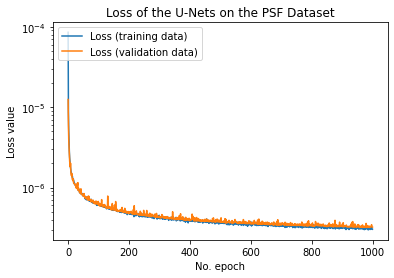

In [21]:
plt.plot(history.history['loss'], label='Loss (training data)')
plt.plot(history.history['val_loss'], label='Loss (validation data)')
plt.title('Loss of the U-Nets on the PSF Dataset')
plt.ylabel('Loss value')
plt.yscale('log')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

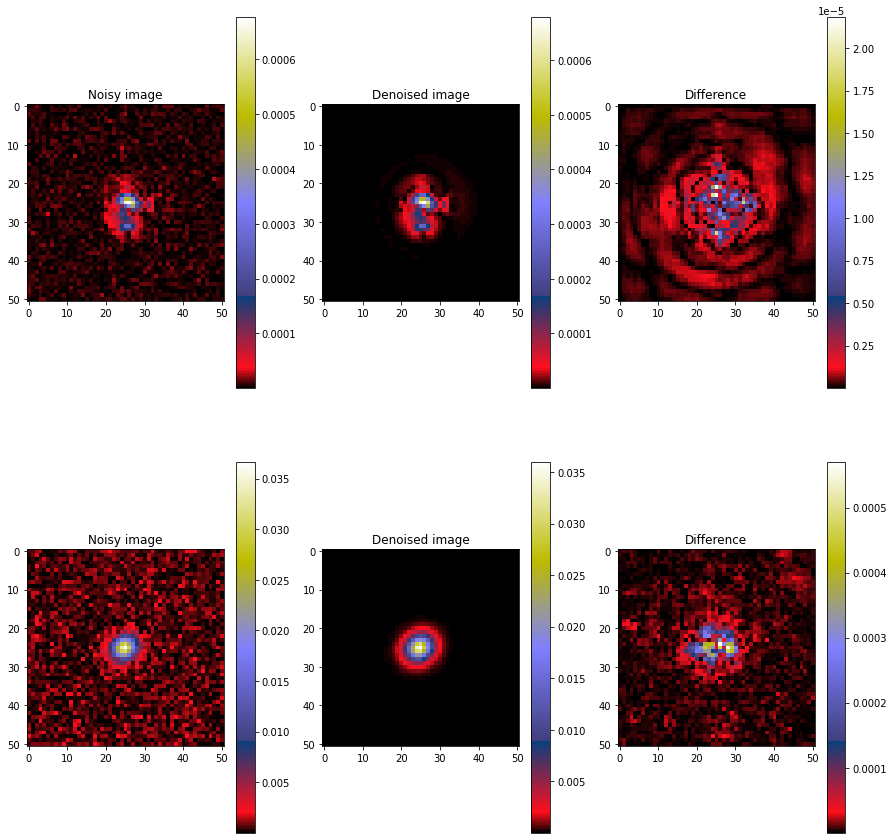

In [22]:
ind = 130
deud = 260


one_star_noiseless = tf.reshape(model.predict(im_val)[ind,:,:], [51, 51])*coeff[ind]
one_star_truth = tf.reshape(tf.convert_to_tensor(target_val[ind,:,:]), [51, 51])*coeff[ind]
one_star_noiseless = tf.cast(one_star_noiseless, one_star_truth.dtype)
one_star_noise = tf.reshape(tf.convert_to_tensor(im_val[ind,:,:]), [51, 51])*coeff[ind]
second_star_noiseless = tf.reshape(model.predict(im_val)[deud,:,:], [51, 51])*coeff[deud]
second_star_truth = tf.reshape(tf.convert_to_tensor(target_val[deud,:,:]), [51, 51])*coeff[deud]
second_star_noiseless = tf.cast(second_star_noiseless, second_star_truth.dtype)
second_star_noise = tf.reshape(tf.convert_to_tensor(im_val[deud,:,:]), [51, 51])*coeff[deud]



fig = plt.figure(num=0, figsize=(15,15))
plt.title('U-Nets Denoising')
subplot(231)
title('Noisy image')
imshow(abs(one_star_noise), interpolation='None',cmap='gist_stern');colorbar()
subplot(232)
#imshow(one_star_noiseless-one_star_truth, interpolation='None',cmap='gist_stern');colorbar()
imshow(abs(one_star_noiseless), interpolation='None',cmap='gist_stern');colorbar()
title('Denoised image')
subplot(233)
imshow(abs(one_star_truth-one_star_noiseless), interpolation='None',cmap='gist_stern');colorbar()
title('Difference')
subplot(234)
title('Noisy image')
imshow(abs(second_star_noise), interpolation='None',cmap='gist_stern');colorbar()
subplot(235)
#imshow(second_star_noiseless-second_star_truth, interpolation='None',cmap='gist_stern');colorbar()
imshow(abs(second_star_noiseless), interpolation='None',cmap='gist_stern');colorbar()
title('Denoised image')
subplot(236)
imshow(abs(second_star_truth-second_star_noiseless), interpolation='None', cmap='gist_stern');colorbar()
title('Difference')
show()


In [20]:
diff_e1_HSM = np.zeros(im_val.shape[0])
diff_e2_HSM = np.zeros(im_val.shape[0])
diff_R2_HSM = np.zeros(im_val.shape[0])
e1_HSM_measured = np.zeros(im_val.shape[0])
e2_HSM_measured = np.zeros(im_val.shape[0])
R2_HSM_measured = np.zeros(im_val.shape[0])
e1_HSM_true = np.zeros(im_val.shape[0])
e2_HSM_true = np.zeros(im_val.shape[0])
R2_HSM_true = np.zeros(im_val.shape[0])
predictions = model.predict(im_val)
for it in range(im_val.shape[0]):
  my_moments = galsim.hsm.FindAdaptiveMom(galsim.Image(np.reshape(predictions[it], (51,51))))
  #diff_e1_HSM[it] = my_moments.observed_shape.g1-dataset2['TRUE_E1_HSM'][it]
  #diff_e2_HSM[it] = my_moments.observed_shape.g2-dataset2['TRUE_E2_HSM'][it]
  #diff_R2_HSM[it] = my_moments.moments_sigma-dataset2['TRUE_R2_HSM'][it]
  #e1_HSM_measured[it] = my_moments.observed_shape.g1
  #e2_HSM_measured[it] = my_moments.observed_shape.g2
  #R2_HSM_measured[it] = my_moments.moments_sigma
  #e1_HSM_true[it] = dataset2['TRUE_E1_HSM'][it]
  #e2_HSM_true[it] = dataset2['TRUE_E2_HSM'][it]
  #R2_HSM_true[it] = dataset2['TRUE_R2_HSM'][it]
    
  diff_e1_HSM[it] = my_moments.observed_shape.g1-dataset['TRUE_E1_HSM'][36000+it]
  diff_e2_HSM[it] = my_moments.observed_shape.g2-dataset['TRUE_E2_HSM'][36000+it]
  diff_R2_HSM[it] = my_moments.moments_sigma-dataset['TRUE_R2_HSM'][36000+it]
  e1_HSM_measured[it] = my_moments.observed_shape.g1
  e2_HSM_measured[it] = my_moments.observed_shape.g2
  R2_HSM_measured[it] = my_moments.moments_sigma
  e1_HSM_true[it] = dataset['TRUE_E1_HSM'][36000+it]
  e2_HSM_true[it] = dataset['TRUE_E2_HSM'][36000+it]
  R2_HSM_true[it] = dataset['TRUE_R2_HSM'][36000+it]
  


KeyError: 'TRUE_E1_HSM'

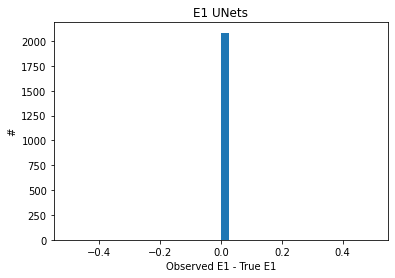

In [21]:
hist(diff_e1_HSM, bins=40)
pyplot.title('E1 UNets')
plt.ylabel("#")
plt.xlabel("Observed E1 - True E1")
plt.savefig("e1_unets.png")

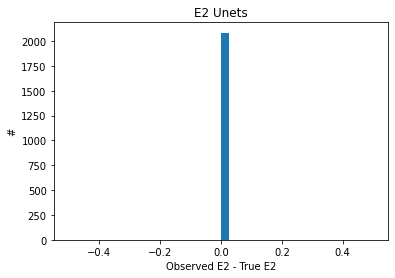

In [22]:
hist(diff_e2_HSM, bins=40)
pyplot.title('E2 Unets')
plt.ylabel("#")
plt.xlabel("Observed E2 - True E2")
plt.savefig("e2_unets.png")

<ipython-input-23-dd32de58bcfa>:1: RuntimeWarning: invalid value encountered in true_divide
  hist(-diff_R2_HSM/R2_HSM_true, bins=40)
/local/home/oa265351/.local/lib/python3.8/site-packages/matplotlib/axes/_axes.py:6623: RuntimeWarning: All-NaN slice encountered
  xmin = min(xmin, np.nanmin(xi))
/local/home/oa265351/.local/lib/python3.8/site-packages/matplotlib/axes/_axes.py:6624: RuntimeWarning: All-NaN slice encountered
  xmax = max(xmax, np.nanmax(xi))


ValueError: autodetected range of [nan, nan] is not finite

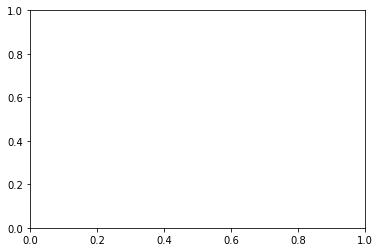

In [23]:
hist(-diff_R2_HSM/R2_HSM_true, bins=40)
pyplot.title('R2 Unets')
plt.ylabel("#")
plt.xlabel("(Observed R2 - True R2)/True R2")
plt.savefig("R2_unets.png")

In [29]:
from sklearn.metrics import mean_squared_error

print(mean_squared_error(e1_HSM_measured, e1_HSM_true, squared=False))
print(mean_squared_error(e2_HSM_measured, e2_HSM_true, squared=False))
print(mean_squared_error(R2_HSM_measured, R2_HSM_true, squared=False))

0.0
0.0
0.0


In [30]:
print(mean(diff_e1_HSM))
print(mean(diff_e2_HSM))
print(mean(diff_R2_HSM))

0.0
0.0
0.0


In [25]:
model.save('saving_unets')

INFO:tensorflow:Assets written to: saving_unets/assets


INFO:tensorflow:Assets written to: saving_unets/assets


In [10]:
len(dataset['TRUE_E1_HSM'])




KeyError: 'TRUE_E1_HSM'